In [107]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from prettytable import PrettyTable
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import warnings
warnings.filterwarnings('ignore')

In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [26]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [183]:
df = pd.read_excel("TransDataset.xlsx")
df.head(30)

,ITEM_ID,ITEM_NO,PRODUCT_TYPE,CUST_ID,TRX_DATE,INVOICE_NO,QUANTITY
0,3217532,M25P40-VMN6TPB,MEMORY_EMBEDED,3218,2016-07-26,CX47348203,2500
1,3326781,AU80610006237AASLBX9,CPU / MPU,2470,2016-07-11,CX47346522,50
2,740487,MMBD2837LT1G,DISCRETE,16135,2016-07-27,CX47348534,3000
3,3434776,IHLP1616ABER2R2M11,PEMCO,999999999,2016-07-29,A20160700174,0
4,70072,MMBT3906LT1G,DISCRETE,2356,2016-07-06,CX47346184,12000
5,3204503,PCA9555DWR,LOGIC IC,2506,2016-07-21,A10085337,0
6,3420352,TMP103AYFFR,LINEAR IC,10228,2016-07-25,CX47347899,3000
7,3311565,OV6922-V09N,OPTICAL AND SENSOR,38381,2016-07-06,CX47346191,1152
8,140887,SN74AHC1G126DCKR,LOGIC IC,999999999,2016-07-31,5119,0
9,3216410,SI2303CDS-T1-GE3,DISCRETE,27495,2016-07-11,CX47346636,3000


In [48]:
from collections import Counter

In [49]:
filtered_df = filter(lambda t: t['quantity'] > 0, df)

In [50]:
filtered_df = df[df['QUANTITY'] > 0]

In [52]:
df.shape

(157396, 7)

In [51]:
print(filtered_df)

         ITEM_ID                   ITEM_NO    PRODUCT_TYPE  CUST_ID  \
0        3217532            M25P40-VMN6TPB  MEMORY_EMBEDED     3218   
1        3326781      AU80610006237AASLBX9       CPU / MPU     2470   
2         740487              MMBD2837LT1G        DISCRETE    16135   
4          70072              MMBT3906LT1G        DISCRETE     2356   
6        3420352               TMP103AYFFR       LINEAR IC    10228   
...          ...                       ...             ...      ...   
157389  14691206             74HCT365D,653        LOGIC IC     2100   
157390   3249493               74HC04D,653        LOGIC IC     2197   
157391    133619           74LVC2G17GW,125        LOGIC IC     2579   
157392  15231095  MT41K256M16TW-107:P TRAY  MEMORY_EMBEDED    43262   
157395  14852949        MT41K64M16TW-107:J  MEMORY_EMBEDED    47302   

         TRX_DATE  INVOICE_NO  QUANTITY  
0      2016-07-26  CX47348203      2500  
1      2016-07-11  CX47346522        50  
2      2016-07-27  CX

In [109]:
all_transactions = [transaction[1]['PRODUCT_TYPE'].tolist() for transaction in list(df.groupby(['CUST_ID', 'TRX_DATE']))]

In [110]:
len(all_transactions)

15197

In [111]:
all_transactions[0:10]

[['MEMORY_EMBEDED',
  'MEMORY_EMBEDED',
  'MEMORY_EMBEDED',
  'MEMORY_EMBEDED',
  'MEMORY_EMBEDED'],
 ['MEMORY_EMBEDED'],
 ['LINEAR IC', 'LINEAR IC'],
 ['DISCRETE',
  'DISCRETE',
  'LOGIC IC',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'LOGIC IC',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'LOGIC IC',
  'CHIPSET / ASP',
  'LINEAR IC',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'LOGIC IC',
  'LOGIC IC',
  'LOGIC IC',
  'DISCRETE',
  'CHIPSET / ASP',
  'DISCRETE',
  'DISCRETE',
  'CHIPSET / ASP',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'LOGIC IC',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'LOGIC IC',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'CPU / MPU',
  'LOGIC IC',
  'DISCRETE',
  'DISCRETE',
  'DISCRETE',
  'DIS

In [112]:
trans_encoder = TransactionEncoder() # Instanciate the encoder
trans_encoder_matrix = trans_encoder.fit(all_transactions).transform(all_transactions)
trans_encoder_matrix = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)

In [113]:
trans_encoder_matrix.head()

,CHIPSET / ASP,CPU / MPU,DISCRETE,LINEAR IC,LOGIC IC,MEMORY_EMBEDED,MEMORY_SYSTEM,OPTICAL AND SENSOR,OTHERS,PEMCO
0,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False
3,True,True,True,True,True,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False


In [115]:
def perform_rule_calculation(transact_items_matrix, rule_type="fpgrowth", min_support=0.001):
    """
    desc: this function performs the association rule calculation 
    @params:
        - transact_items_matrix: the transaction X Items matrix
        - rule_type: 
                    - apriori or Growth algorithms (default="fpgrowth")
                    
        - min_support: minimum support threshold value (default = 0.001)
        
    @returns:
        - the matrix containing 3 columns:
            - support: support values for each combination of items
            - itemsets: the combination of items
            - number_of_items: the number of items in each combination of items
            
        - the excution time for the corresponding algorithm
        
    """
    start_time = 0
    total_execution = 0
    
    if(not rule_type=="fpgrowth"):
        start_time = time.time()
        rule_items = apriori(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Apriori!")
        
    else:
        start_time = time.time()
        rule_items = fpgrowth(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Fp Growth!")
    
    rule_items['number_of_items'] = rule_items['itemsets'].apply(lambda x: len(x))
    
    return rule_items, total_execution

In [116]:
def compute_association_rule(rule_matrix, metric="lift", min_thresh=1):
    """
    @desc: Compute the final association rule
    @params:
        - rule_matrix: the corresponding algorithms matrix
        - metric: the metric to be used (default is lift)
        - min_thresh: the minimum threshold (default is 1)
        
    @returns:
        - rules: all the information for each transaction satisfying the given metric & threshold
    """
    rules = association_rules(rule_matrix, 
                              metric=metric, 
                              min_threshold=min_thresh)
    
    return rules

In [117]:
def plot_metrics_relationship(rule_matrix, col1, col2):
    """
    desc: shows the relationship between the two input columns 
    @params:
        - rule_matrix: the matrix containing the result of a rule (apriori or Fp Growth)
        - col1: first column
        - col2: second column
    """
    fit = np.polyfit(rule_matrix[col1], rule_matrix[col2], 1)
    fit_funt = np.poly1d(fit)
    plt.plot(rule_matrix[col1], rule_matrix[col2], 'yo', rule_matrix[col1], 
    fit_funt(rule_matrix[col1]))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} vs {}'.format(col1, col2))

In [118]:
def compare_time_exec(algo1=list, alg2=list):
    """
    @desc: shows the execution time between two algorithms
    @params:
        - algo1: list containing the description of first algorithm, where
            
        - algo2: list containing the description of second algorithm, where
    """
    
    execution_times = [algo1[1], algo2[1]]
    algo_names = (algo1[0], algo2[0])
    y=np.arange(len(algo_names))
    
    plt.bar(y,execution_times,color=['orange', 'blue'])
    plt.xticks(y,algo_names)
    plt.xlabel('Algorithms')
    plt.ylabel('Time')
    plt.title("Execution Time (seconds) Comparison")
    plt.show()

In [119]:
val = {'name':12}
value = list(val.items())[0]

In [120]:
value

('name', 12)

In [121]:
fpgrowth_matrix, fp_growth_exec_time = perform_rule_calculation(trans_encoder_matrix) # Run the algorithm
print("Fp Growth execution took: {} seconds".format(fp_growth_exec_time))

Computed Fp Growth!
Fp Growth execution took: 0.05529594421386719 seconds


In [122]:
fpgrowth_matrix.head()

,support,itemsets,number_of_items
0,0.101,(MEMORY_EMBEDED),1
1,0.310,(LINEAR IC),1
2,0.286,(DISCRETE),1
3,0.184,(CPU / MPU),1
4,0.160,(LOGIC IC),1


In [123]:
fpgrowth_matrix.tail()

,support,itemsets,number_of_items
401,0.004,"(DISCRETE, LOGIC IC, LINEAR IC, MEMORY_SYSTEM)",4
402,0.003,"(LOGIC IC, MEMORY_EMBEDED, LINEAR IC, MEMORY_S...",4
403,0.003,"(DISCRETE, LOGIC IC, MEMORY_EMBEDED, MEMORY_SY...",4
404,0.002,"(DISCRETE, MEMORY_EMBEDED, LOGIC IC, LINEAR IC...",5
405,0.004,"(DISCRETE, MEMORY_EMBEDED, MEMORY_SYSTEM)",3


In [124]:
fp_growth_rule_lift = compute_association_rule(fpgrowth_matrix)

In [125]:
fp_growth_rule_lift.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(DISCRETE),(MEMORY_EMBEDED),0.286,0.101,0.040,0.139,1.370,0.011,1.043
1,(MEMORY_EMBEDED),(DISCRETE),0.101,0.286,0.040,0.392,1.370,0.011,1.174
2,(LOGIC IC),(MEMORY_EMBEDED),0.160,0.101,0.033,0.205,2.029,0.017,1.131
3,(MEMORY_EMBEDED),(LOGIC IC),0.101,0.160,0.033,0.324,2.029,0.017,1.244
4,(MEMORY_EMBEDED),(LINEAR IC),0.101,0.310,0.040,0.398,1.284,0.009,1.146


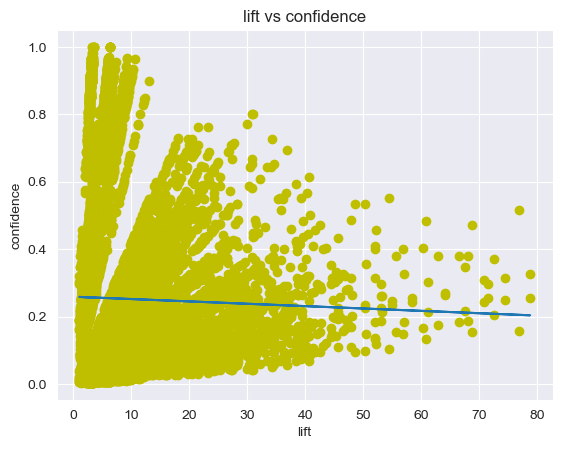

In [126]:
plot_metrics_relationship(fp_growth_rule_lift, col1='lift', col2='confidence')

In [127]:
fp_growth_rule = compute_association_rule(fpgrowth_matrix, metric="confidence", min_thresh=0.2)
fp_growth_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(MEMORY_EMBEDED),(DISCRETE),0.101,0.286,0.040,0.392,1.370,0.011,1.174
1,(LOGIC IC),(MEMORY_EMBEDED),0.160,0.101,0.033,0.205,2.029,0.017,1.131
2,(MEMORY_EMBEDED),(LOGIC IC),0.101,0.160,0.033,0.324,2.029,0.017,1.244
3,(MEMORY_EMBEDED),(LINEAR IC),0.101,0.310,0.040,0.398,1.284,0.009,1.146
4,"(DISCRETE, MEMORY_EMBEDED)",(LINEAR IC),0.040,0.310,0.029,0.720,2.322,0.016,2.462


In [128]:
apriori_matrix, apriori_exec_time = perform_rule_calculation(trans_encoder_matrix, rule_type="apriori")
print("Apriori Execution took: {} seconds".format(apriori_exec_time))

Computed Apriori!
Apriori Execution took: 0.04146885871887207 seconds


In [146]:
def recommend(PRODUCT_TYPE, transactions, min_support=0.5, min_confidence=0.75):
    rules = apriori(transactions, min_support=min_support, min_confidence=min_confidence)
    filtered_rules = [r for r in rules if r.items.issubset(PRODUCT_TYPE)]
    recommendations = set()
    for r in filtered_rules:
        recommendations.update(r.ordered_statistics[0].items_add)
        return recommendations

In [147]:
apriori_matrix.head()

,support,itemsets,number_of_items
0,0.074,(CHIPSET / ASP),1
1,0.184,(CPU / MPU),1
2,0.286,(DISCRETE),1
3,0.310,(LINEAR IC),1
4,0.160,(LOGIC IC),1


In [148]:
apriori_matrix.tail()

,support,itemsets,number_of_items
401,0.001,"(DISCRETE, MEMORY_EMBEDED, LOGIC IC, CPU / MPU...",7
402,0.001,"(DISCRETE, LOGIC IC, CPU / MPU, PEMCO, LINEAR ...",7
403,0.001,"(MEMORY_EMBEDED, LOGIC IC, CPU / MPU, PEMCO, L...",7
404,0.001,"(DISCRETE, MEMORY_EMBEDED, LOGIC IC, PEMCO, LI...",7
405,0.002,"(DISCRETE, MEMORY_EMBEDED, LOGIC IC, PEMCO, LI...",7


In [149]:
apriori_rule_lift = compute_association_rule(apriori_matrix)

In [150]:
apriori_rule_lift.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CHIPSET / ASP),(CPU / MPU),0.074,0.184,0.021,0.282,1.530,0.007,1.136
1,(CPU / MPU),(CHIPSET / ASP),0.184,0.074,0.021,0.114,1.530,0.007,1.044
2,(LOGIC IC),(CHIPSET / ASP),0.160,0.074,0.014,0.088,1.183,0.002,1.015
3,(CHIPSET / ASP),(LOGIC IC),0.074,0.160,0.014,0.189,1.183,0.002,1.036
4,(MEMORY_EMBEDED),(CHIPSET / ASP),0.101,0.074,0.009,0.092,1.232,0.002,1.019


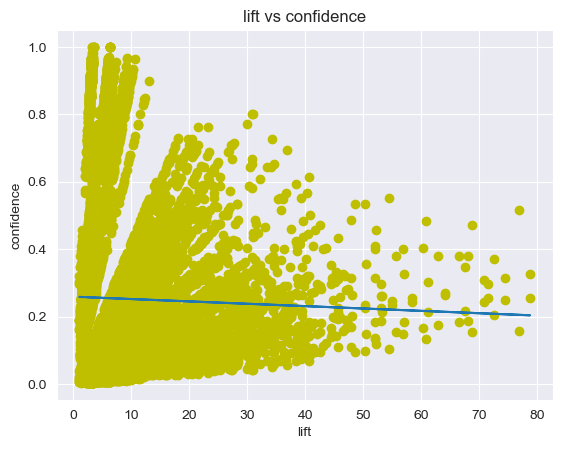

In [151]:
plot_metrics_relationship(apriori_rule_lift, col1='lift', col2='confidence')

In [134]:
apripri_rule = compute_association_rule(apriori_matrix, metric="confidence", min_thresh=0.2)
apripri_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CHIPSET / ASP),(CPU / MPU),0.074,0.184,0.021,0.282,1.530,0.007,1.136
1,(CHIPSET / ASP),(DISCRETE),0.074,0.286,0.016,0.218,0.763,-0.005,0.913
2,(CHIPSET / ASP),(LINEAR IC),0.074,0.310,0.019,0.254,0.819,-0.004,0.925
3,(DISCRETE),(LINEAR IC),0.286,0.310,0.131,0.458,1.479,0.042,1.274
4,(LINEAR IC),(DISCRETE),0.310,0.286,0.131,0.423,1.479,0.042,1.237


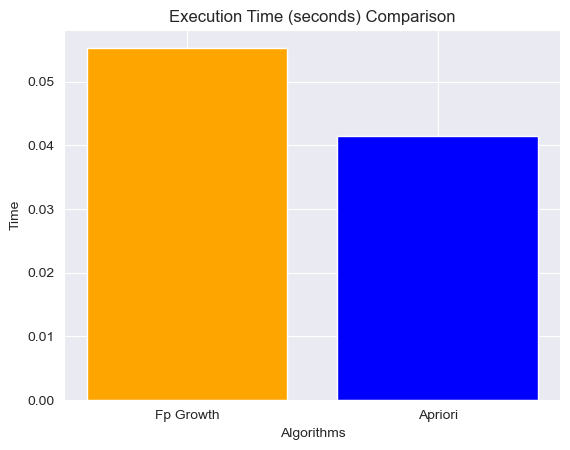

In [135]:
algo1 = ['Fp Growth', fp_growth_exec_time]
algo2 = ['Apriori', apriori_exec_time]

compare_time_exec(algo1, algo2)

In [179]:
class AssociationRule:
    def __init__(self, antecedent, consequent, support, confidence):
        self.antecedent = antecedent
        self.consequent = consequent
        self.support = support
        self.confidence = confidence

In [180]:
import pickle

def save_rules(rules, file_name):
    with open(file_name, "wb") as f:
        pickle.dump(rules, f)

In [181]:
def load_rules(file_name):
    with open(file_name, "rb") as f:
        return pickle.load(f)

In [182]:
rules = [
    AssociationRule(["A", "B"], ["C"], 0.5, 0.8),
    AssociationRule(["C"], ["D", "E"], 0.6, 0.7)
]

# 將規則存檔
save_rules(rules, "rules.pkl")

# 讀取規則
loaded_rules = load_rules("rules.pkl")

# 顯示讀取的規則
for rule in loaded_rules:
    print(f"{rule.antecedent} -> {rule.consequent} (Support: {rule.support}, Confidence: {rule.confidence})")

['A', 'B'] -> ['C'] (Support: 0.5, Confidence: 0.8)
['C'] -> ['D', 'E'] (Support: 0.6, Confidence: 0.7)


In [176]:
from apyori import apriori
def save_rules(rules, file_path):
  # Open the file for writing
  with open(file_path, '/Users/austin/opt/anaconda3/DM4') as f:
    # Iterate over the rules
    for r in rules:
      # Write the rule to the file
      f.write(str(r))
    f.write('/Users/austin/opt/anaconda3/DM4')

In [191]:
transactions = []
for transaction in transactions:
    try:
        transaction = [int(x) for x in transaction]
    except ValueError:
            pass
    transactions.append(transaction)
    rules = apriori(transactions, min_support=0.5, min_confidence=0.75)

# Save the rules to a file
save_rules(rules, 'rules.txt')

In [192]:
def load_rules(file_path):
  # Initialize an empty list to store the rules
  rules = []

  # Open the file for reading
  with open(file_path, '/Users/austin/opt/anaconda3/DM4') as f:
    # Iterate over each line in the file
    for line in f:
      # Split the line into the antecedent and consequent parts
      antecedent, consequent = line.split(' -> ')
      # Split the antecedent and consequent into individual items
      antecedent = antecedent.split(', ')
      consequent = consequent.split(', ')
      # Create a rule object and add it to the list
      rules.append((antecedent, consequent))
  
  # Return the list of rules
  return rules

In [193]:
def recommend(PRODUCT_TYPE, transactions, min_support=0.5, min_confidence=0.75):
    rules = apriori(transactions, min_support=min_support, min_confidence=min_confidence)
    filtered_rules = [r for r in rules if r.items.issubset(PRODUCT_TYPE)]
    recommendations = set()
    for r in filtered_rules:
        recommendations.update(r.consequents)
        return recommendations

In [159]:
df = pd.read_excel('TransDataset.xlsx')
transactions = []
for row in df.values:
    transactions.append(list(row))
    products = ['PRODUCT_TYPE']
    recommendations = recommend(products, transactions)
    print(recommendations)

TypeError: apriori() got an unexpected keyword argument 'min_threshold'